<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.4 MB/s eta 0:00:00


In [2]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61825590 sha256=8501a8d0a24d257a78e2db750c956f1537ce64a9d8f8966074efe4f4e49e08d1
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9437046 sha256=708252de49d21ad580edde1aef564ebb0359935af0ef7cf234dbd58e1e226524
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [3]:
import pyupbit

In [81]:
import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute15", count=400)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                           open        high         low       close  \
2023-04-04 10:45:00  36866000.0  36880000.0  36821000.0  36875000.0   
2023-04-04 11:00:00  36875000.0  36893000.0  36828000.0  36880000.0   
2023-04-04 11:15:00  36880000.0  36953000.0  36864000.0  36949000.0   
2023-04-04 11:30:00  36953000.0  36995000.0  36944000.0  36995000.0   
2023-04-04 11:45:00  36994000.0  36994000.0  36874000.0  36874000.0   
...                         ...         ...         ...         ...   
2023-04-08 13:30:00  37071000.0  37073000.0  37039000.0  37051000.0   
2023-04-08 13:45:00  37050000.0  37051000.0  36992000.0  37037000.0   
2023-04-08 14:00:00  37037000.0  37048000.0  36992000.0  37040000.0   
2023-04-08 14:15:00  37048000.0  37080000.0  37040000.0  37080000.0   
2023-04-08 14:30:00  37080000.0  37080000.0  37048000.0  37071000.0   

                        volume         value  
2023-04-04 10:45:00  29.120645  1.073409e+09  
2023-04-04 11:00:00  25.830582  9.521684e+08  
2023-0

In [82]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-04 10:45:00,36875000.0
1,2023-04-04 11:00:00,36880000.0
2,2023-04-04 11:15:00,36949000.0
3,2023-04-04 11:30:00,36995000.0
4,2023-04-04 11:45:00,36874000.0
...,...,...
395,2023-04-08 13:30:00,37051000.0
396,2023-04-08 13:45:00,37037000.0
397,2023-04-08 14:00:00,37040000.0
398,2023-04-08 14:15:00,37080000.0


In [83]:
#prophet 불러옴
from fbprophet import Prophet

In [84]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [85]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=15, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


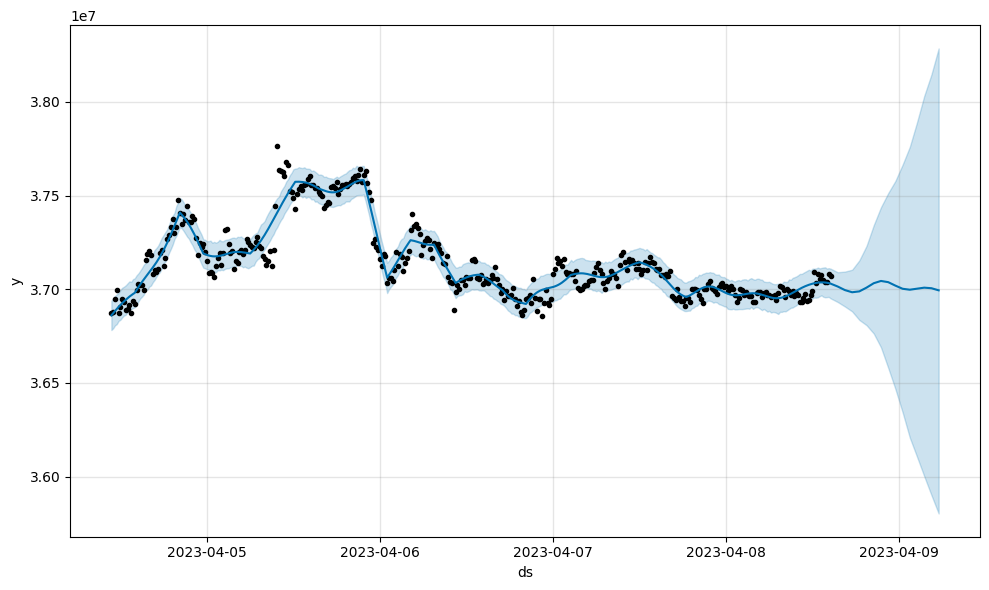

In [86]:
#그래프1
fig1 = model.plot(forecast)

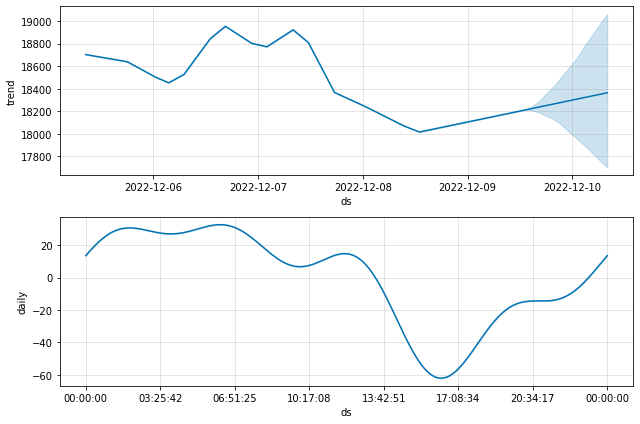

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)